# Jupyter notebook to rougly calculate the total cost of a loan

## Disclaimer

Always check with your bank and or finacialadvisor first. There are many factors that affect the cost of a loan and intrest-rates are often not stable. This notebook can only provide you (user) with an idea of what the cost of the loan is and where the money is going. I (author) did this as a personal project to see how well it suited my situation and to make some graphs of my loan. It might not be suited for you and your situation, and I take no resposibility for any financial problems that appears from using my notebook.

The notebook doesn't store any data of it's users of any kind more than the values given to it, these are only stored locally and during runtime.

## Information and input of data

For this notebook to function it needs some information about your loan. Please enter the values in to the variables. The notebook expects integers for most values expcept intrest where a decimal number works as well. "Extra payment" is if you are able to pay more than the expected monthly amount that the notebook calculates with loan_amount, duration, and intrest. Try to come up with an average here. It is not needed for most of the calculations.

#### Please not that you need to rerun the whole notebook after changing these values

In [1]:
#Variables
years = 3                # Number of years to pay back the loan
interest = 13.8          # The intrest in %
loan_amount = 20000     # The amount borrowed
extra_payment = 100     # What you could pay extra towards the loan per month on avrage (extra amortization)

currency = "SEK"         # Symbol or letters for your prefered currency (i.e USD, $, £, €, SEK, CAD, AUD)

Also not that diffrent banks may handle extra payments/extra amortization diffrently. Local laws and regulations might also affect this.

## Imports and global variables

In [2]:
import matplotlib.pyplot as plt

In [3]:
monthly_cost = 0

### Here we do a calculation of the total cost of the loan based on the information given (not including extra_payments)

In [4]:
def calculate_total_cost(loan_amount, duration, interest_rate):
    # Calculate the total cost of the loan
    monthly_interest_rate = float(interest_rate) / 100 / 12
    total_months = int(duration) * 12

    # Calculate the monthly payment
    monthly_payment = float(loan_amount) * (monthly_interest_rate * (1 + monthly_interest_rate) ** total_months) / ((1 + monthly_interest_rate) ** total_months - 1)

    # Calculate the amount owed and interest per month
    balance = loan_amount
    owed_per_month = []
    interest_per_month = []

    for _ in range(total_months):
        interest = balance * monthly_interest_rate
        principal = monthly_payment - interest
        balance -= principal
        owed_per_month.append(balance)
        interest_per_month.append(interest)

    # Calculate the total cost by multiplying the monthly payment by the total number of months
    total_cost = monthly_payment * total_months

    return total_cost, owed_per_month, interest_per_month

### Here we do a calculation of the total cost of the loan based on the information given (including extra_payments)

In [5]:
def calculate_total_cost_including(loan_amount, duration, interest_rate, extra_payment):
    # Calculate the total cost of the loan
    monthly_interest_rate = float(interest_rate) / 100 / 12
    total_months = int(duration) * 12

    # Calculate the monthly payment
    monthly_payment = float(loan_amount) * (monthly_interest_rate * (1 + monthly_interest_rate) ** total_months) / ((1 + monthly_interest_rate) ** total_months - 1)

    # Calculate the total cost with extra payments
    total_cost = 0
    remaining_balance = float(loan_amount)
    interest_per_month = []
    owed_per_month = []
    total_amount_months = []

    for month in range(total_months):
        interest = remaining_balance * monthly_interest_rate
        total_payment = monthly_payment + extra_payment
        principal = min(total_payment - interest, remaining_balance)
        remaining_balance -= principal
        total_cost += total_payment
        interest_per_month.append(interest)
        owed_per_month.append(remaining_balance)
        total_amount_months.append(month + 1)

        if remaining_balance <= 0:
            break


    return str(int(total_cost)), str(len(total_amount_months)), owed_per_month, interest_per_month

### Calculating the monthly payment (exculding any extra payments)

In [6]:
def calculate_monthly_cost(loan_amount, duration, interest_rate):
    # Calculate the monthly cost of the loan
    monthly_interest_rate = interest_rate / 100 / 12
    total_months = duration * 12

    # Calculate the monthly payment
    monthly_payment = loan_amount * (monthly_interest_rate * (1 + monthly_interest_rate) ** total_months) / ((1 + monthly_interest_rate) ** total_months - 1)

    return str(int(monthly_payment))

### Here you can see the results and make sure the seem correct

In [7]:
total_cost, owed_per_month, intrest_per_month = calculate_total_cost(loan_amount, years, interest)
monthly_cost = calculate_monthly_cost(loan_amount, years, interest)

print("Monthly cost of the loan should be: " + monthly_cost + " "+ currency)
print("Total cost of the loan should be: " + str(int(total_cost)) + " "+ currency)

if extra_payment > 0:
    total_cost_including, amount_of_payments_including, owed_per_month_including, intrest_per_month_including = calculate_total_cost_including(loan_amount, years, interest, extra_payment)
    print("Total cost of the loan should be: " + str(int(total_cost_including)) +" "+ currency + " with extra payments for " + amount_of_payments_including + " months")

Monthly cost of the loan should be: 681 SEK
Total cost of the loan should be: 24538 SEK
Total cost of the loan should be: 24229 SEK with extra payments for 31 months


### The following code is to draw some diagrams to better show what we just calculated

This will be a lot of code, unless you are intressted you can scroll down a bit to see the final results.

Monthly cost of the loan should be: 681 SEK
Total cost of the loan should be: 24538 SEK
Total cost of the loan should be: 24229 SEK with extra payments. Total duration: 31 months


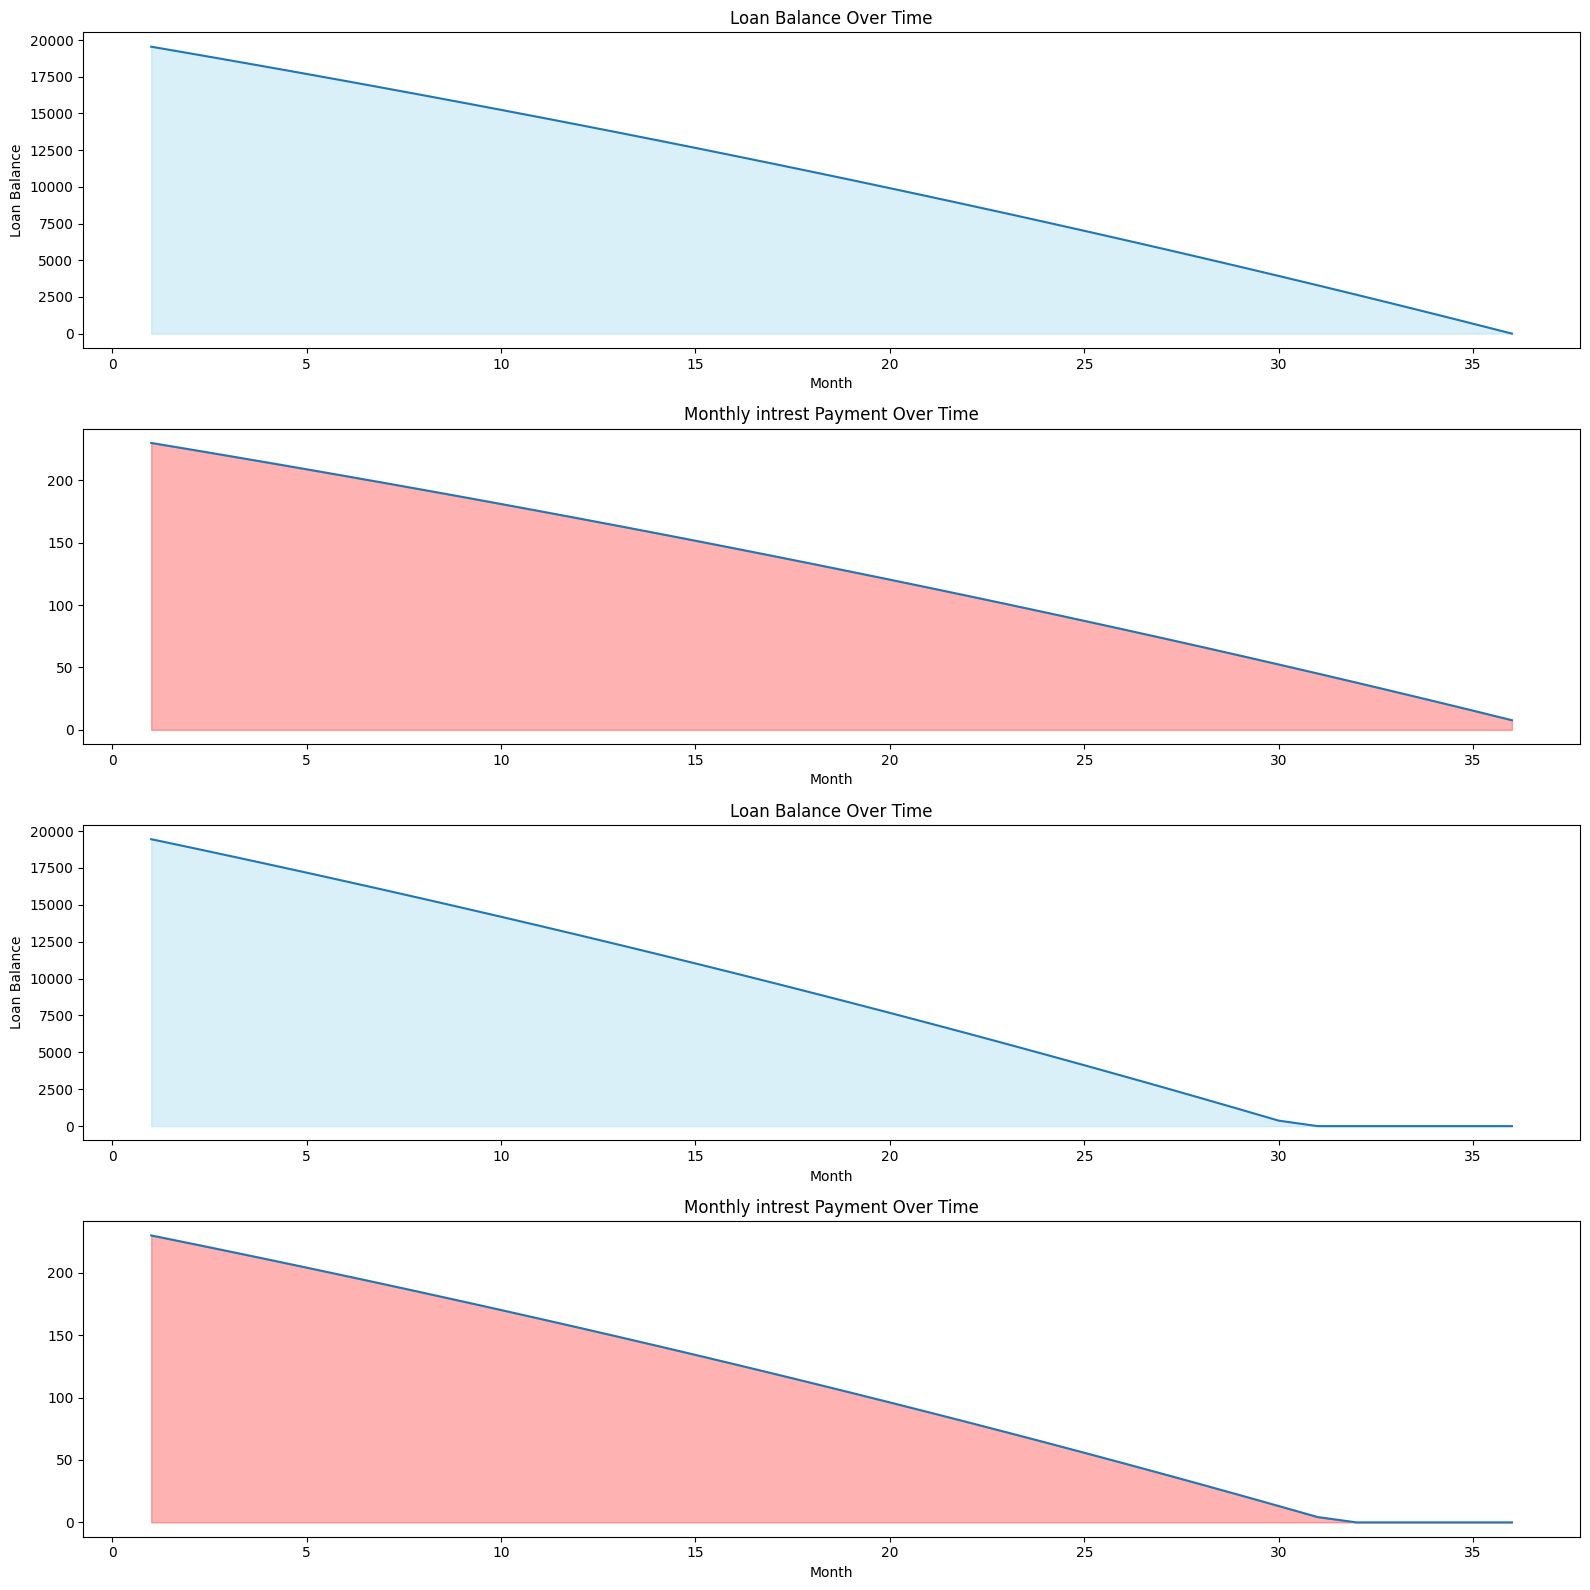

In [9]:
# Create two subplots
fig, axs = plt.subplots(4, 1, figsize=(16, 16))

# Plot 1: Loan balance over time
months = range(1, len(owed_per_month) + 1)
axs[0].plot(months, owed_per_month)
axs[0].fill_between(months, owed_per_month, color='skyblue', alpha=0.3)  # Fill area beneath the line
axs[0].set_xlabel("Month")
axs[0].set_ylabel("Loan Balance")
axs[0].set_title("Loan Balance Over Time")

# Plot 2: Intrest payment over time
axs[1].plot(months, intrest_per_month, label="Intrest")
axs[1].set_xlabel("Month")
axs[1].set_title("Monthly intrest Payment Over Time")
axs[1].fill_between(months, intrest_per_month, color='red', alpha=0.3)  # Fill area beneath the line



while len(months)>len(owed_per_month_including):
    owed_per_month_including.append(0)
while len(months)>len(intrest_per_month_including):
    intrest_per_month_including.append(0)

# Plot 3: Loan balance over time with extra payments
months = range(1, len(owed_per_month) + 1)
axs[2].plot(months, owed_per_month_including)
axs[2].fill_between(months, owed_per_month_including, color='skyblue', alpha=0.3)  # Fill area beneath the line
axs[2].set_xlabel("Month")
axs[2].set_ylabel("Loan Balance")
axs[2].set_title("Loan Balance Over Time")

# Plot 3: Loan balance over time with extra payments
axs[3].plot(months, intrest_per_month_including, label="Intrest")
axs[3].set_xlabel("Month")
axs[3].set_title("Monthly intrest Payment Over Time")
axs[3].fill_between(months, intrest_per_month_including, color='red', alpha=0.3)  # Fill area beneath the line



print("Monthly cost of the loan should be: " + monthly_cost + " "+ currency)
print("Total cost of the loan should be: " + str(int(total_cost)) + " "+ currency)

if extra_payment > 0:
    total_cost_including, amount_of_payments_including, owed_per_month_including, intrest_per_month_including = calculate_total_cost_including(loan_amount, years, interest, extra_payment)
    print("Total cost of the loan should be: " + str(int(total_cost_including)) +" "+ currency + " with extra payments. Total duration: " + amount_of_payments_including + " months")

# Adjust spacing between subplots
plt.tight_layout()
# Display the plots
plt.show()